# Data Generation for the Rummy Pool

In [1]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')



number_of_players_in_pool = int(input('How many players do you want to have in the pool: '))
bet_multiplier_options = [0.05, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 40, 80, 125, 200]
min_amount = [4, 8, 20, 40, 80, 160, 240, 400, 800, 1600, 3200, 6400, 10000, 16000]
bet_min = dict(zip(bet_multiplier_options, min_amount))
print(bet_min)

bet_multiplier_input = float(input("How much do you want the bet amount multiplier to be?\nChoose from the options - (0.05, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 40, 80, 125, 200): "))
print(f"You have chosen the bet amount multiplier to be: {bet_multiplier_input}")

for key in bet_min.keys():
    if key == bet_multiplier_input:
        min_amt_required = float(bet_min[key])
        print("Minimum amount is:", min_amt_required)
        print(type(min_amt_required))
    else:
        continue
        print("Sorry, you have chosen a wrong bet amount multiplier, please try again by chosing one from the options mentioned here (0.05, 0.1, 0.25, 0.5, 1, 2, 3,5, 10, 20, 40, 80, 125, 200): ")

totalPlayers = {}
for i in range(number_of_players_in_pool):
    x = ''.join([random.choice(string.ascii_uppercase) for k in range(4)]).title()
    y = round(random.uniform(min_amt_required, (min_amt_required + 150)), 3)
    totalPlayers[x] = y

Sum = sum(totalPlayers.values())
print(f"The total amount involved in this pool is: {Sum}")
total_players_df = pd.DataFrame(totalPlayers.items(), columns=['Name', 'Balance in Rupees'])
print("The below table shows all the players in the pool along with their account balances.")
print(total_players_df)

total_amount_credited_to_app = 0
percentage_deduction = 15 / 100



matches_data = []

def matches():
    global total_amount_credited_to_app
    global matches_data

    eligible_players = {k: v for k, v in totalPlayers.items() if v >= min_amt_required}

    if len(eligible_players) < 2:
        print("Insufficient eligible players for a match.")
        return

    p1 = random.choice(list(eligible_players.items()))
    del eligible_players[p1[0]]
    p2 = random.choice(list(eligible_players.items()))

    match_data = {
        'Match Number':'',
        'Player 1': p1[0],
        'Player 2': p2[0],
        'Loser': '',
        'Winner': '',
        'Points Lost by Loser': '',
        'Amount Lost by Loser': '',
        'Amount Remaining for Loser': '',
        'Amount to be Credited to App': '',
        'Total Amount Earned by App': '',
        'Amount Won by Winner': '',
        'Amount Remaining for Winner': ''
    }
    
    match_data['Match Number'] = len(matches_data) + 1
    
    remaining_balances = totalPlayers.copy()
    for player, balance in remaining_balances.items():
        if player == match_data['Loser']:
            match_data[player] = totalPlayers[player] - (random.randint(2, 80) * bet_multiplier_input)
        elif player == match_data['Winner']:
            match_data[player] = totalPlayers[player] + (
                        totalPlayers[match_data['Loser']] * bet_multiplier_input * (100 - percentage_deduction) / 100)
        else:
            match_data[player] = balance
    
    for players, remaining_bal in totalPlayers.items():
        if players == match_data['Loser']:
            match_data[players] = amount_remaining_for_loser
        elif players == match_data['Winner']:
            match_data[players] == amount_remaining_for_winner
        else:
            match_data[players] == remaining_bal
    
    match_data['Loser'] = p1[0] if random.choice([p1, p2]) == p2 else p2[0]
    match_data['Winner'] = p1[0] if match_data['Loser'] == p2[0] else p2[0]

    points_lost = random.choice(range(2, 80))
    amount_deducted_from_loser = round(points_lost * bet_multiplier_input, 3)
    amount_remaining_for_loser = round(totalPlayers[match_data['Loser']] - amount_deducted_from_loser, 3)
    amount_credited_to_app = round(amount_deducted_from_loser * percentage_deduction, 3)
    total_amount_credited_to_app += amount_credited_to_app

    match_data['Points Lost by Loser'] = points_lost
    match_data['Amount Lost by Loser'] = amount_deducted_from_loser
    match_data['Amount Remaining for Loser'] = amount_remaining_for_loser
    match_data['Amount to be Credited to App'] = amount_credited_to_app
    match_data['Total Amount Earned by App'] = total_amount_credited_to_app

    amount_earnt_by_winner = round(amount_deducted_from_loser - amount_credited_to_app, 3)
    amount_remaining_for_winner = round(totalPlayers[match_data['Winner']] + amount_earnt_by_winner, 3)

    match_data['Amount Won by Winner'] = amount_earnt_by_winner
    match_data['Amount Remaining for Winner'] = amount_remaining_for_winner

    totalPlayers[match_data['Loser']] = amount_remaining_for_loser
    totalPlayers[match_data['Winner']] = amount_remaining_for_winner
    
    
    print(f"In this match we have : \n {p1} v/s {p2}")
    print(f'Where player 1 is : {p1}')
    print(f'and player 2 is : {p2}')
    
    print (f"The Winner is : {match_data['Winner']} ")
    print(f"And the loser is : {match_data['Loser']}  ")
    
    print(f"Points lost by loser - {match_data['Loser']}  is : \n {points_lost}")
    print(f"Amount lost by loser - {match_data['Loser']}  is : \n {amount_deducted_from_loser}")
    print (f"Amount remaining in the loser {match_data['Loser']}'s account is : \n {amount_remaining_for_loser}")
    (f"Amount won by winner {match_data['Winner']} is : \n {amount_earnt_by_winner}")
    print(f"Amount remaining in the winner {match_data['Winner']}'s account is : \n {amount_remaining_for_winner}")
    
    print(f"Amount to be credited to app is : \n {amount_credited_to_app}")
    print(f"Total amount earnt by app is : \n {total_amount_credited_to_app}")
    
    closing_balance_of_match = pd.DataFrame(totalPlayers.items(), columns=['Name', "Balance"])
    closing_balance_of_match.loc[closing_balance_of_match['Name'] == match_data['Loser'], 'Balance'] = amount_remaining_for_loser
    closing_balance_of_match.loc[closing_balance_of_match['Name'] == match_data['Winner'], 'Balance'] = amount_remaining_for_winner
    print(f"The closing balance of this match is \n {closing_balance_of_match}")

   
    matches_data.append(match_data)

counter = len(totalPlayers)
print(counter)
match = 0

while counter > 1:
    matches()
    match += 1
    print(f"Match {match} concluded")
    print("-" * 120)
    counter = sum(1 for amount in totalPlayers.values() if amount >= min_amt_required)

matches_df = pd.DataFrame(matches_data)



How many players do you want to have in the pool: 10
{0.05: 4, 0.1: 8, 0.25: 20, 0.5: 40, 1: 80, 2: 160, 3: 240, 5: 400, 10: 800, 20: 1600, 40: 3200, 80: 6400, 125: 10000, 200: 16000}
How much do you want the bet amount multiplier to be?
Choose from the options - (0.05, 0.1, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 40, 80, 125, 200): .05
You have chosen the bet amount multiplier to be: 0.05
Minimum amount is: 4.0
<class 'float'>
The total amount involved in this pool is: 807.433
The below table shows all the players in the pool along with their account balances.
   Name  Balance in Rupees
0  Chqx            132.399
1  Elan            120.592
2  Ygkt             97.339
3  Xipw             60.701
4  Zmwe             72.394
5  Xsiu            140.367
6  Ezkp             38.711
7  Fjyr             90.870
8  Rkzd             44.737
9  Cgen              9.323
10
In this match we have : 
 ('Elan', 120.592) v/s ('Zmwe', 72.394)
Where player 1 is : ('Elan', 120.592)
and player 2 is : ('Zmwe', 72.394)
The

In [2]:
list(totalPlayers.keys())

['Chqx',
 'Elan',
 'Ygkt',
 'Xipw',
 'Zmwe',
 'Xsiu',
 'Ezkp',
 'Fjyr',
 'Rkzd',
 'Cgen']

In [3]:
matches_df

Match Number Player 1 Player 2 Loser Winner  Points Lost by Loser  \
0                1     Elan     Zmwe  Elan   Zmwe                    57   
1                2     Fjyr     Zmwe  Fjyr   Zmwe                    26   
2                3     Rkzd     Chqx  Rkzd   Chqx                     5   
3                4     Xsiu     Xipw  Xipw   Xsiu                    70   
4                5     Xsiu     Ezkp  Xsiu   Ezkp                    58   
...            ...      ...      ...   ...    ...                   ...   
2237          2238     Xsiu     Chqx  Chqx   Xsiu                    49   
2238          2239     Chqx     Xsiu  Xsiu   Chqx                    10   
2239          2240     Xsiu     Chqx  Xsiu   Chqx                    29   
2240          2241     Chqx     Xsiu  Xsiu   Chqx                    76   
2241          2242     Xsiu     Chqx  Xsiu   Chqx                    69   

      Amount Lost by Loser  Amount Remaining for Loser  \
0                     2.85                     117.742   
1                     1.30                      89.570   
2                     0.25                      44.487   
3                     3.50                      57.201   
4                     2.90                     140.442   
...                    ...                         ...   
2237                  2.45                     104.406   
2238                  0.50                       9.399   
2239                  1.45                       7.949   
2240                  3.80                       4.149   
2241                  3.45                       0.699   

      Amount to be Credited to App  Total Amount Earned by App  ...     Chqx  \
0                            0.427                       0.427  ...  132.399   
1                            0.195                       0.622  ...  132.399   
2                            0.037                       0.659  ...  132.399   
3                            0.525                       1.184  ...  132.612   
4                            0.435                       1.619  ...  132.612   
...                            ...                         ...  ...      ...   
2237                         0.367                     671.448  ...  106.856   
2238                         0.075                     671.523  ...  104.406   
2239                         0.217                     671.740  ...  104.831   
2240                         0.570                     672.310  ...  106.064   
2241                         0.517                     672.827  ...  109.294   

         Elan    Ygkt    Xipw    Zmwe     Xsiu    Ezkp    Fjyr    Rkzd   Cgen  
0     120.592  97.339  60.701  72.394  140.367  38.711  90.870  44.737  9.323  
1     117.742  97.339  60.701  74.817  140.367  38.711  90.870  44.737  9.323  
2     117.742  97.339  60.701  75.922  140.367  38.711  89.570  44.737  9.323  
3     117.742  97.339  60.701  75.922  140.367  38.711  89.570  44.487  9.323  
4     117.742  97.339  57.201  75.922  143.342  38.711  89.570  44.487  9.323  
...       ...     ...     ...     ...      ...     ...     ...     ...    ...  
2237    3.786   3.650   3.247   2.917    7.816   1.603   3.458   0.991  2.028  
2238    3.786   3.650   3.247   2.917    9.899   1.603   3.458   0.991  2.028  
2239    3.786   3.650   3.247   2.917    9.399   1.603   3.458   0.991  2.028  
2240    3.786   3.650   3.247   2.917    7.949   1.603   3.458   0.991  2.028  
2241    3.786   3.650   3.247   2.917    4.149   1.603   3.458   0.991  2.028  

[2242 rows x 22 columns]

In [4]:
matches_df.to_excel('Rummy.xlsx', index=False, engine='openpyxl')

In [5]:
App = matches_df['Total Amount Earned by App']
col_names = matches_df.columns

In [6]:
col_names

Index(['Match Number', 'Player 1', 'Player 2', 'Loser', 'Winner',
       'Points Lost by Loser', 'Amount Lost by Loser',
       'Amount Remaining for Loser', 'Amount to be Credited to App',
       'Total Amount Earned by App', 'Amount Won by Winner',
       'Amount Remaining for Winner', 'Chqx', 'Elan', 'Ygkt', 'Xipw', 'Zmwe',
       'Xsiu', 'Ezkp', 'Fjyr', 'Rkzd', 'Cgen'],
      dtype='object')

### Visualization of player's and app's flow of balances

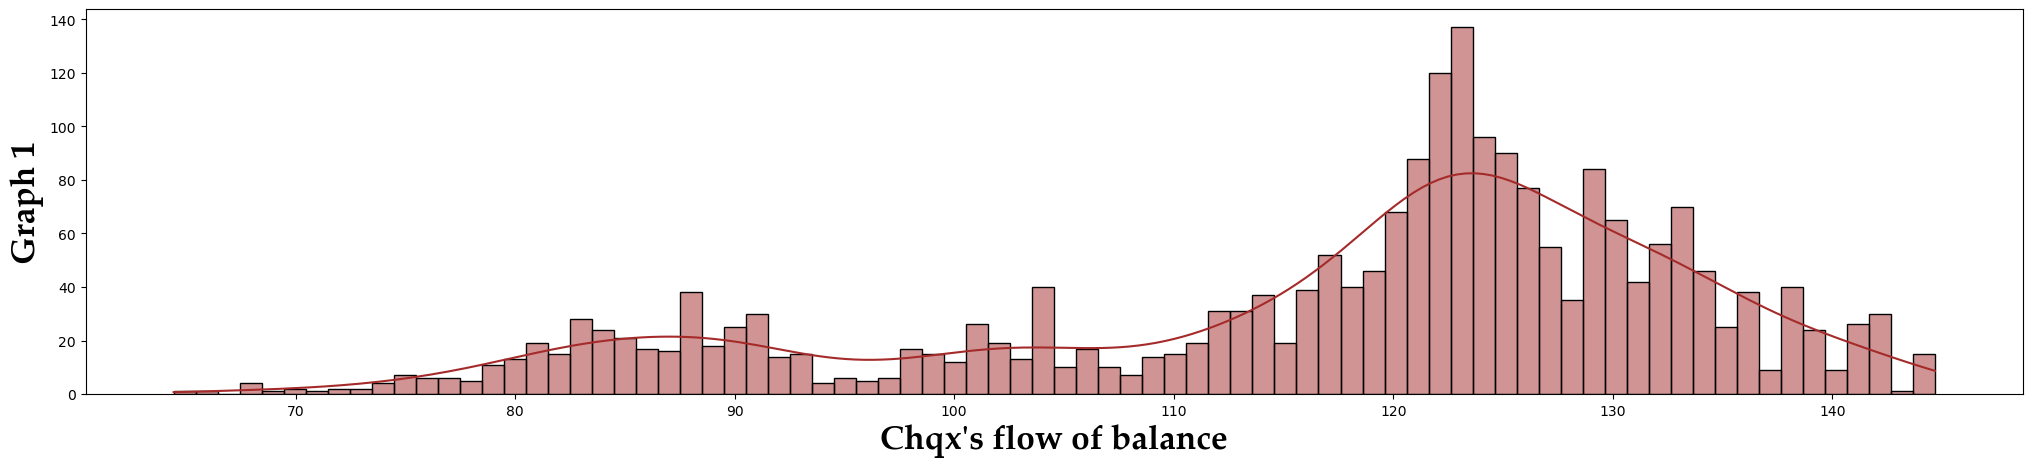

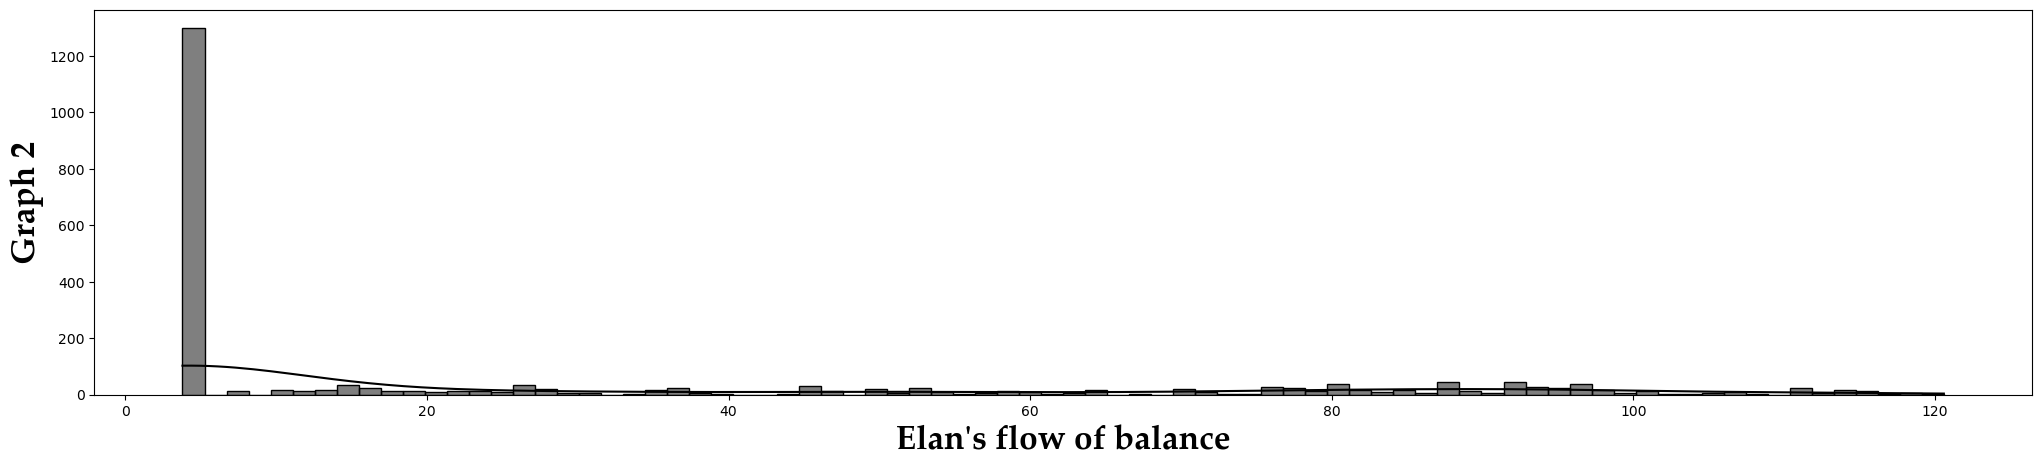

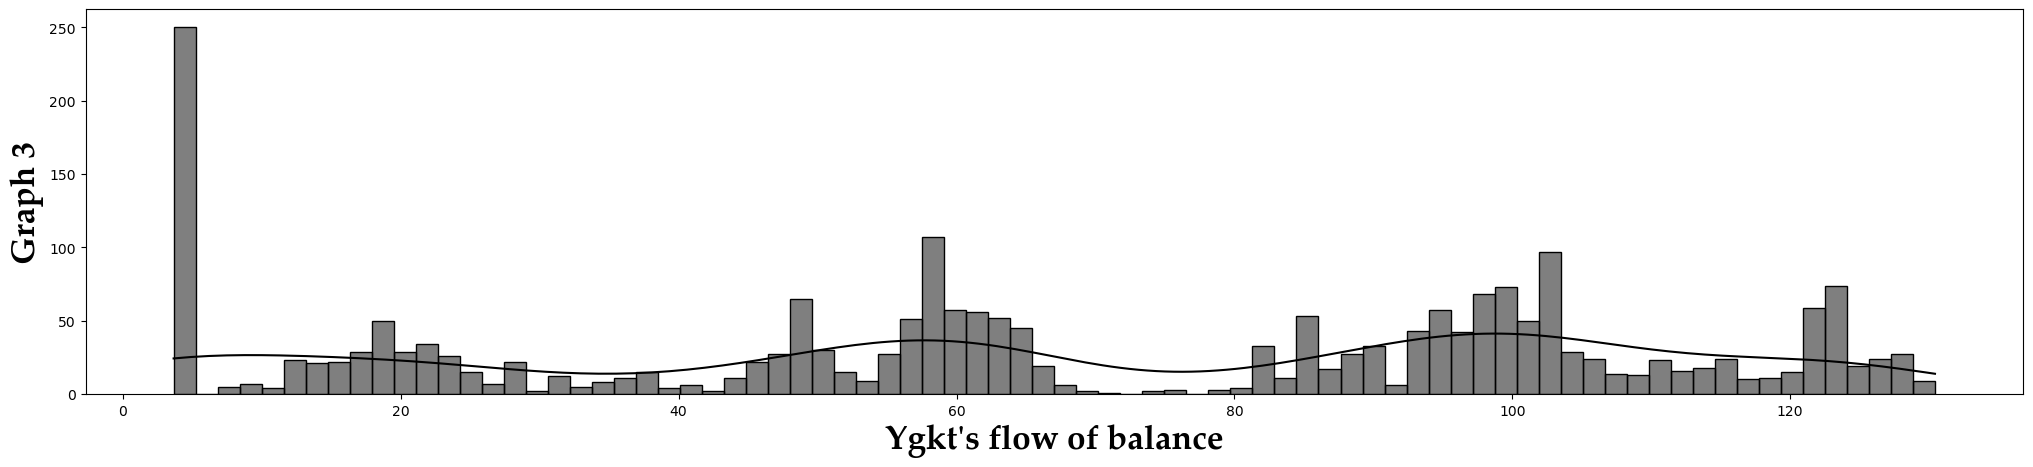

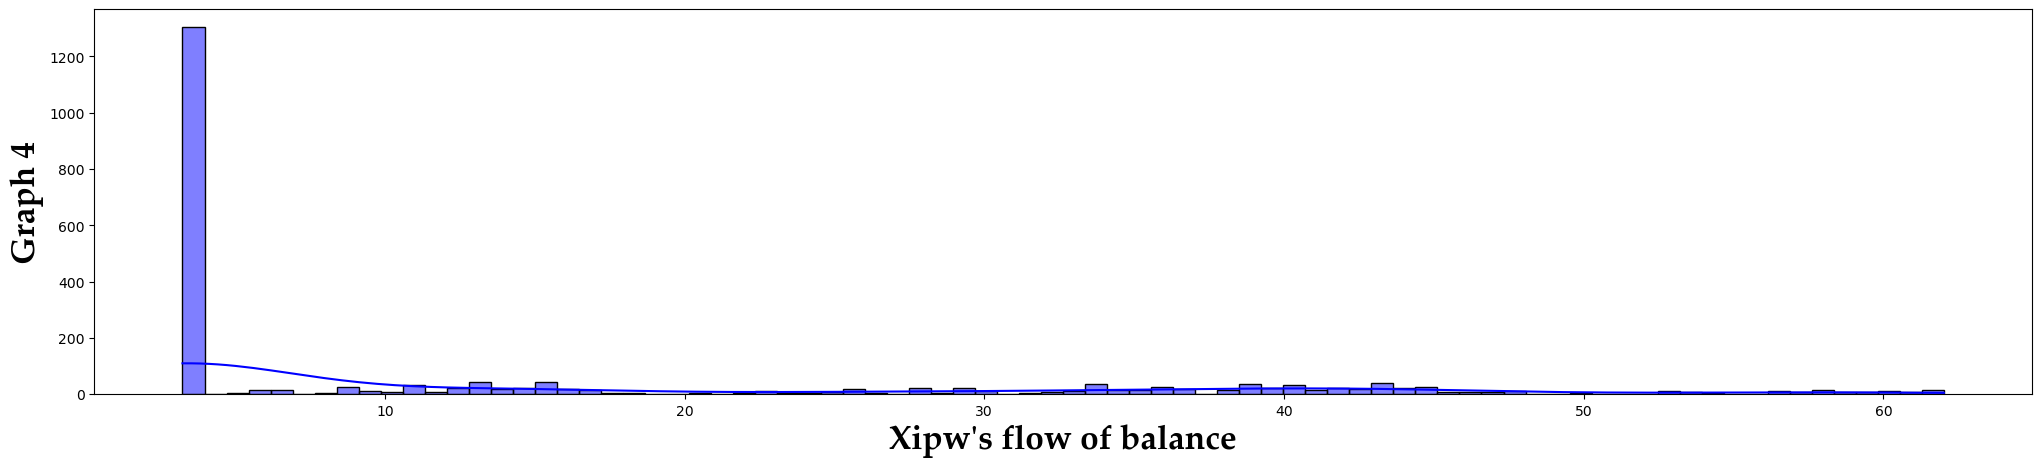

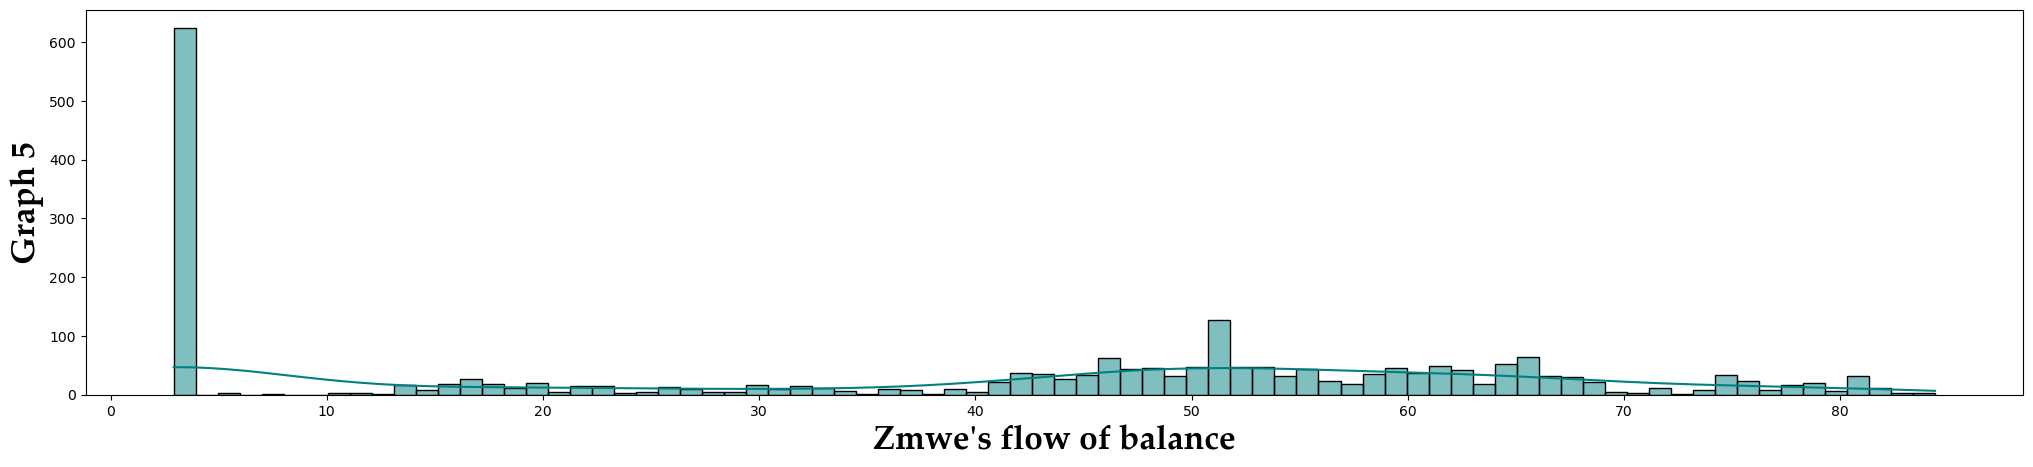

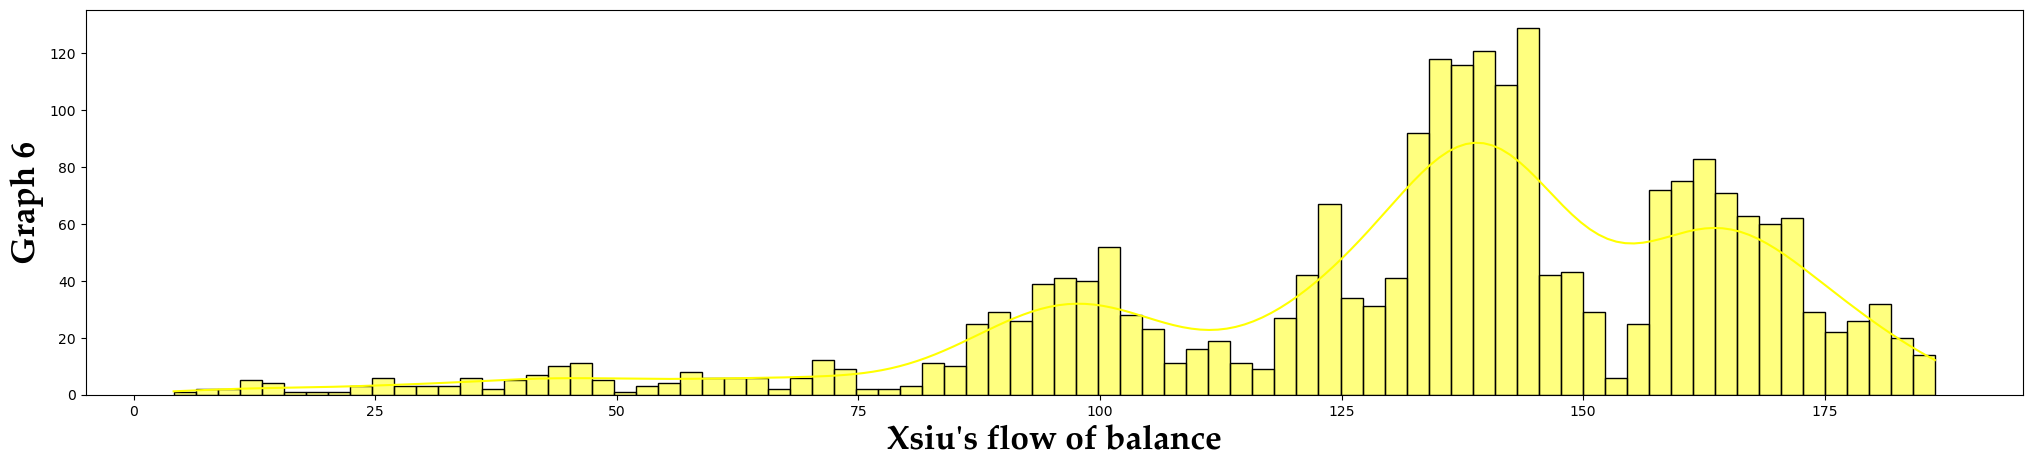

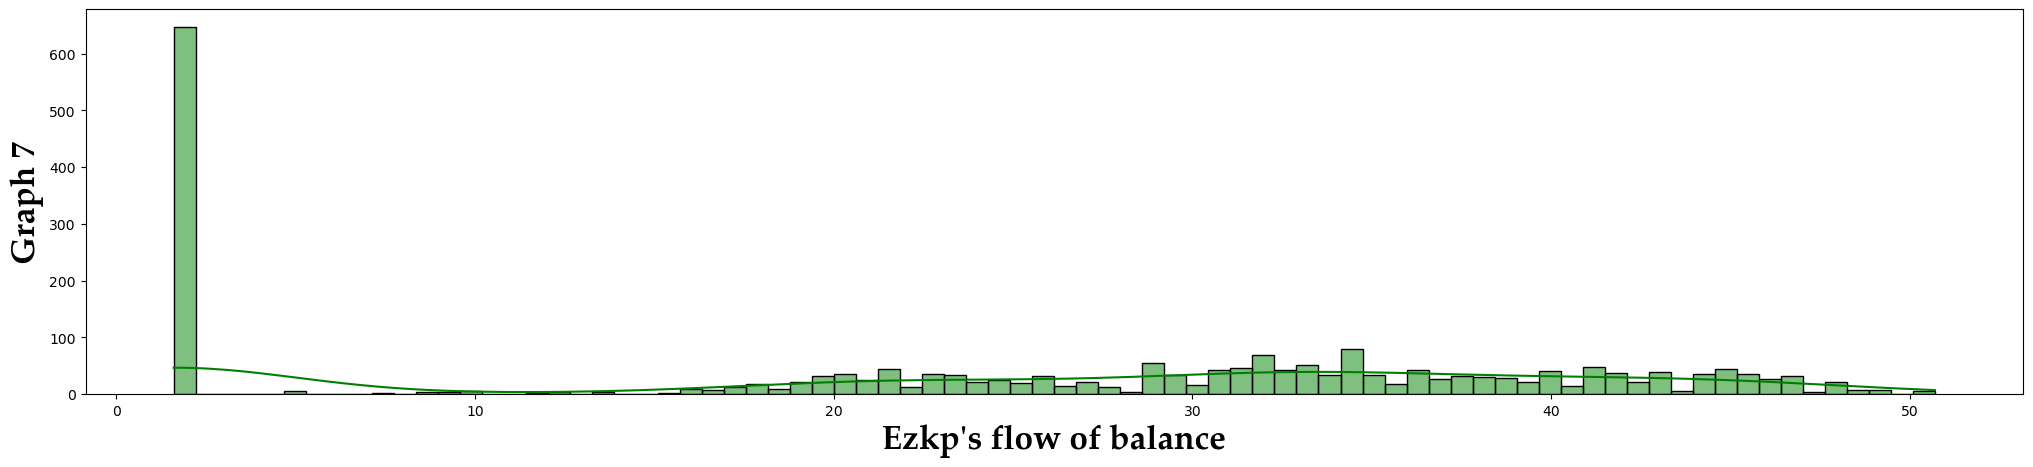

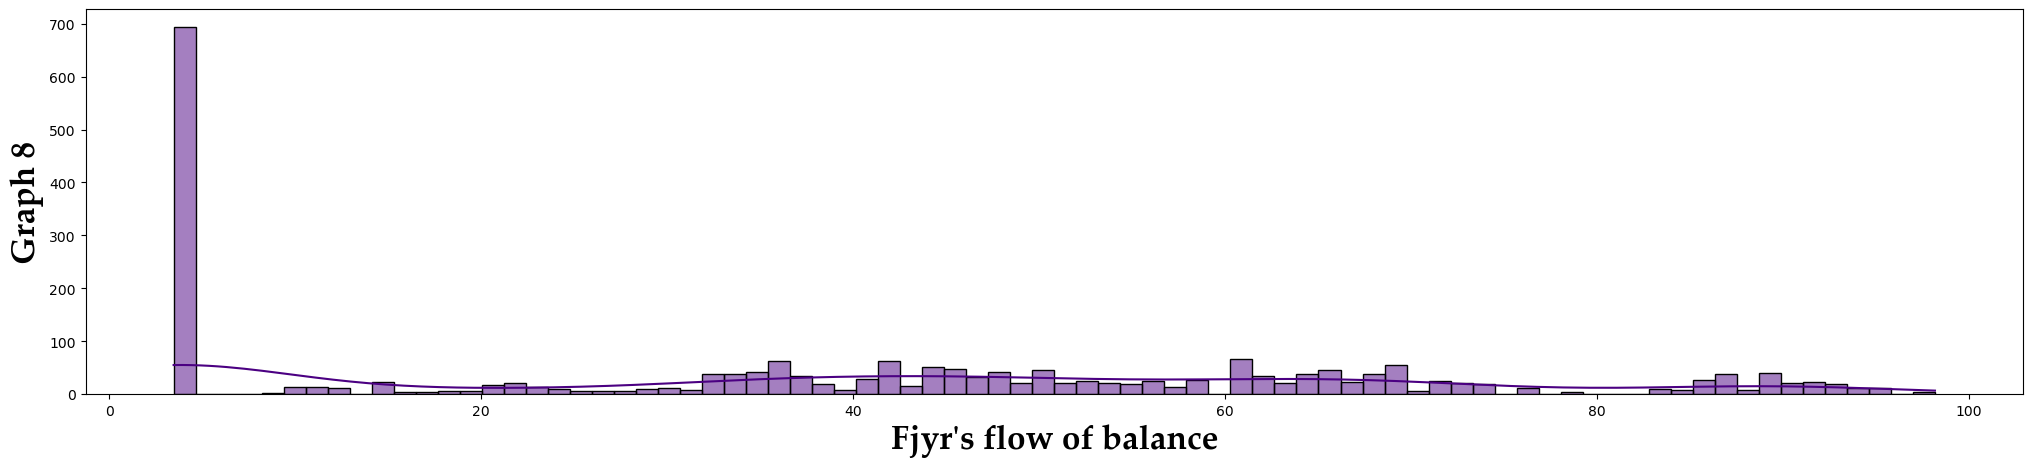

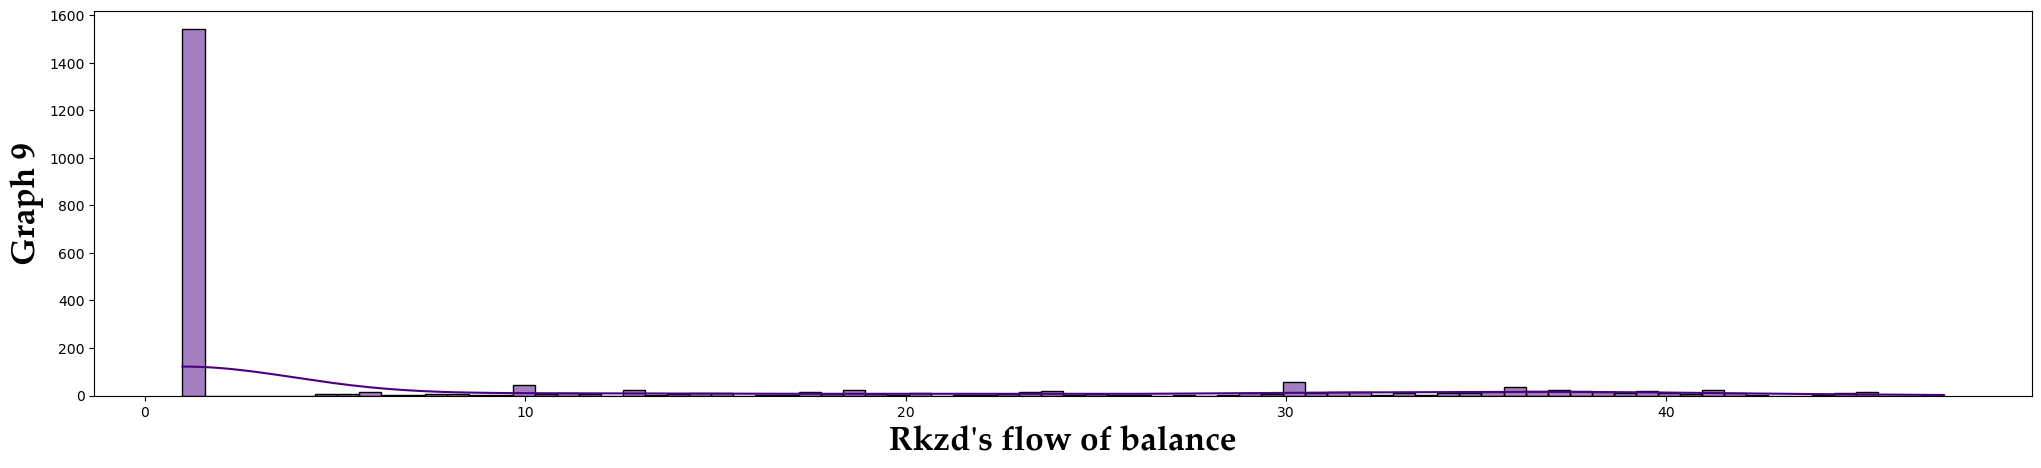

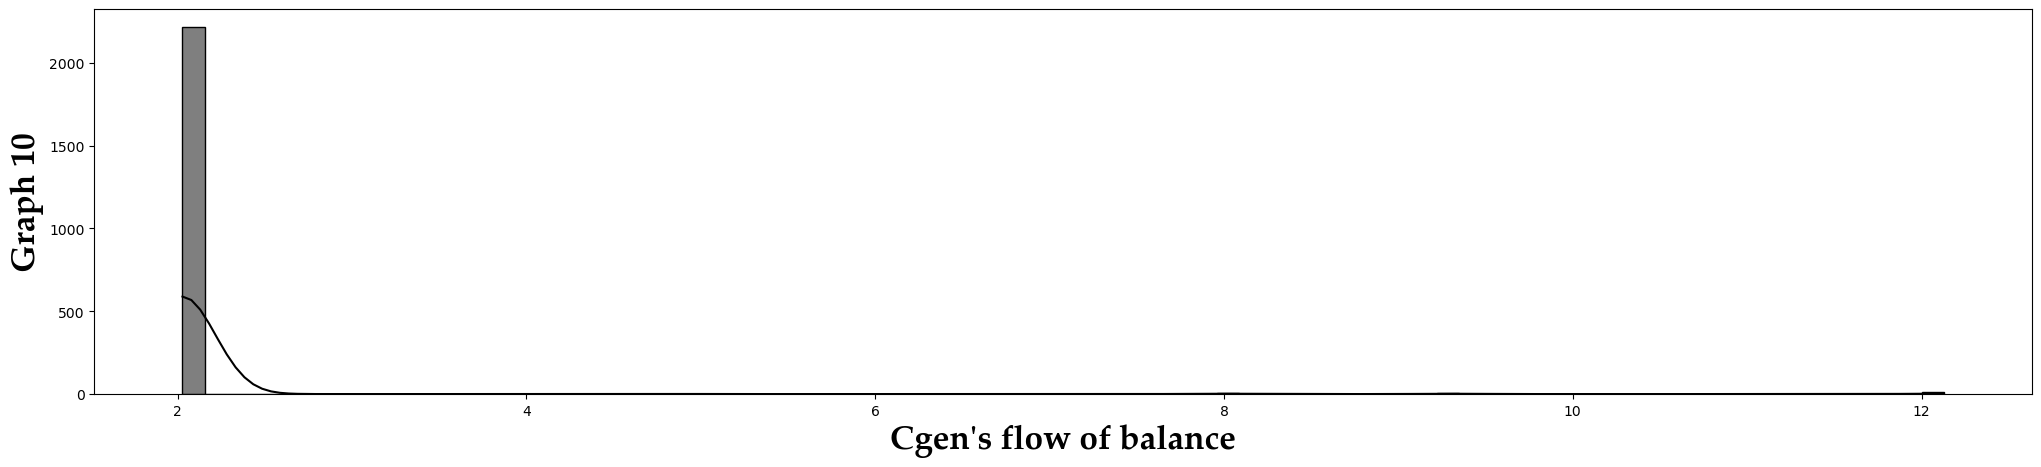

In [7]:
font = {'size':24, 'family':'Palatino Linotype', 'weight':'bold'}
for i in range(number_of_players_in_pool):
    plt.figure(figsize=(25,5))
    plott = sns.histplot(matches_df.iloc[:,12+i], kde=True, bins=80, color= random.choice(['r', 'g','b','k','yellow','black','indigo','teal','purple','brown']))
    plt.xlabel(f"{col_names[12+i]}'s flow of balance", fontdict=font)
    plt.ylabel(f"Graph {i+1}", fontdict=font)
    plt.show()
    i += 1

Text(0, 0.5, 'Count')

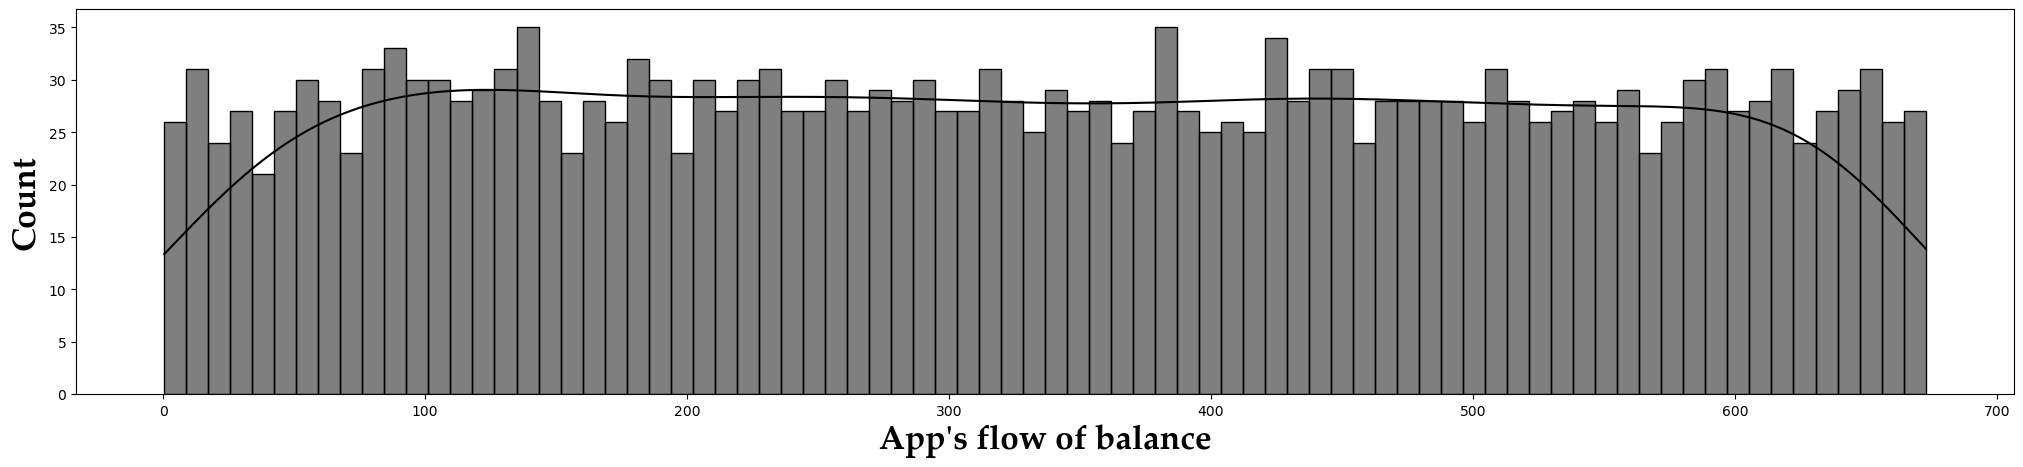

In [8]:
plt.figure(figsize=(25,5))
sns.histplot(matches_df.iloc[:,9], kde=True, bins=80, color='black')
plt.xlabel("App's flow of balance", fontdict=font)
plt.ylabel("Count", fontdict=font)

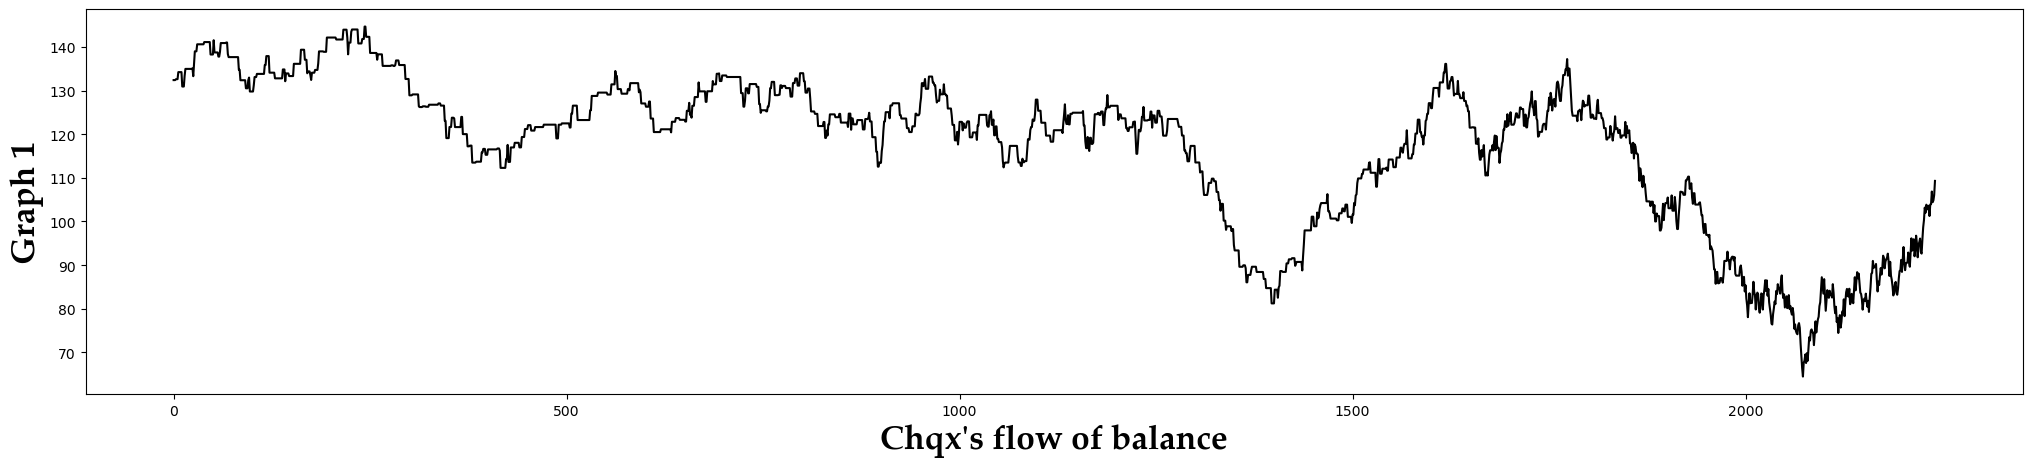

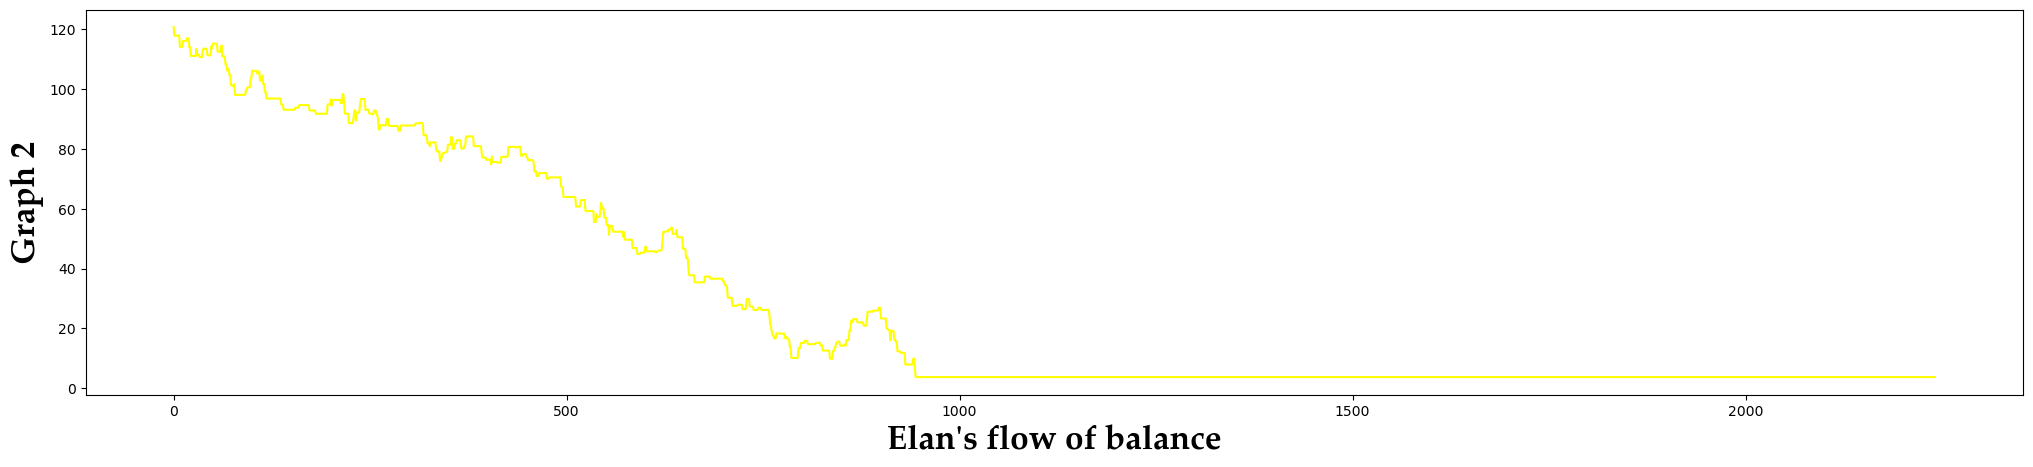

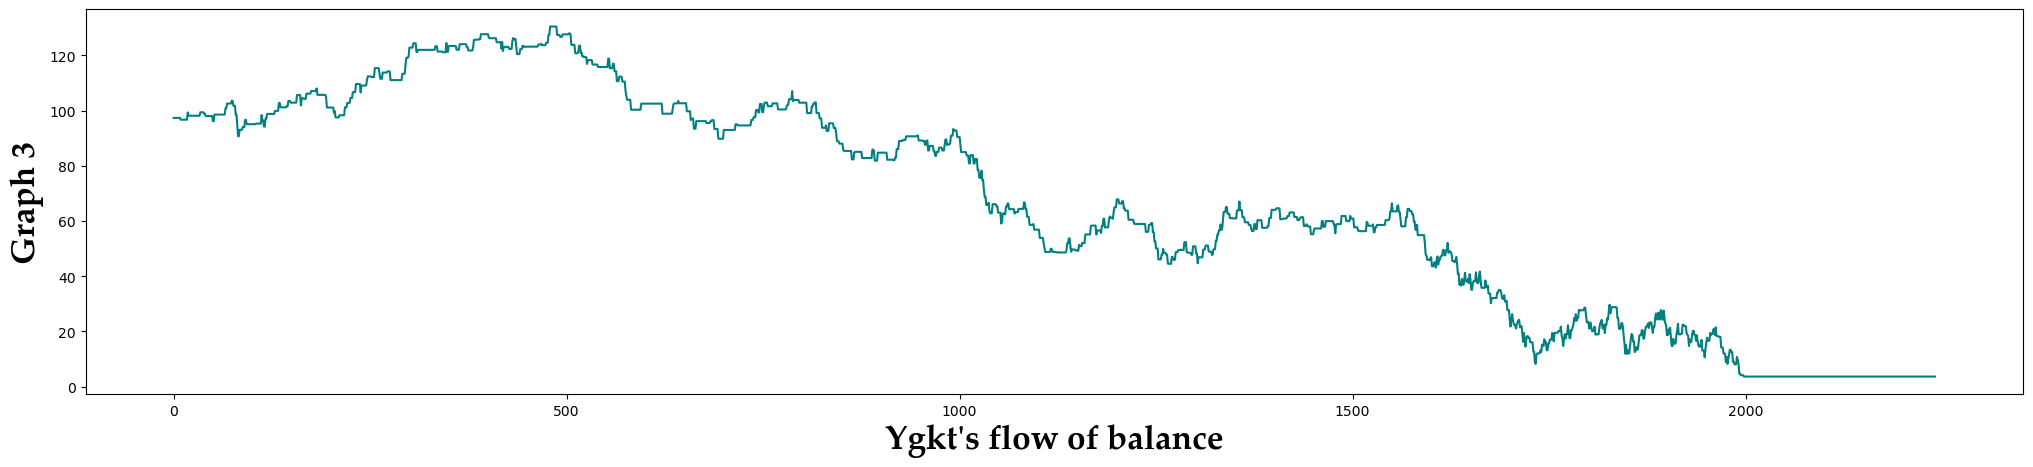

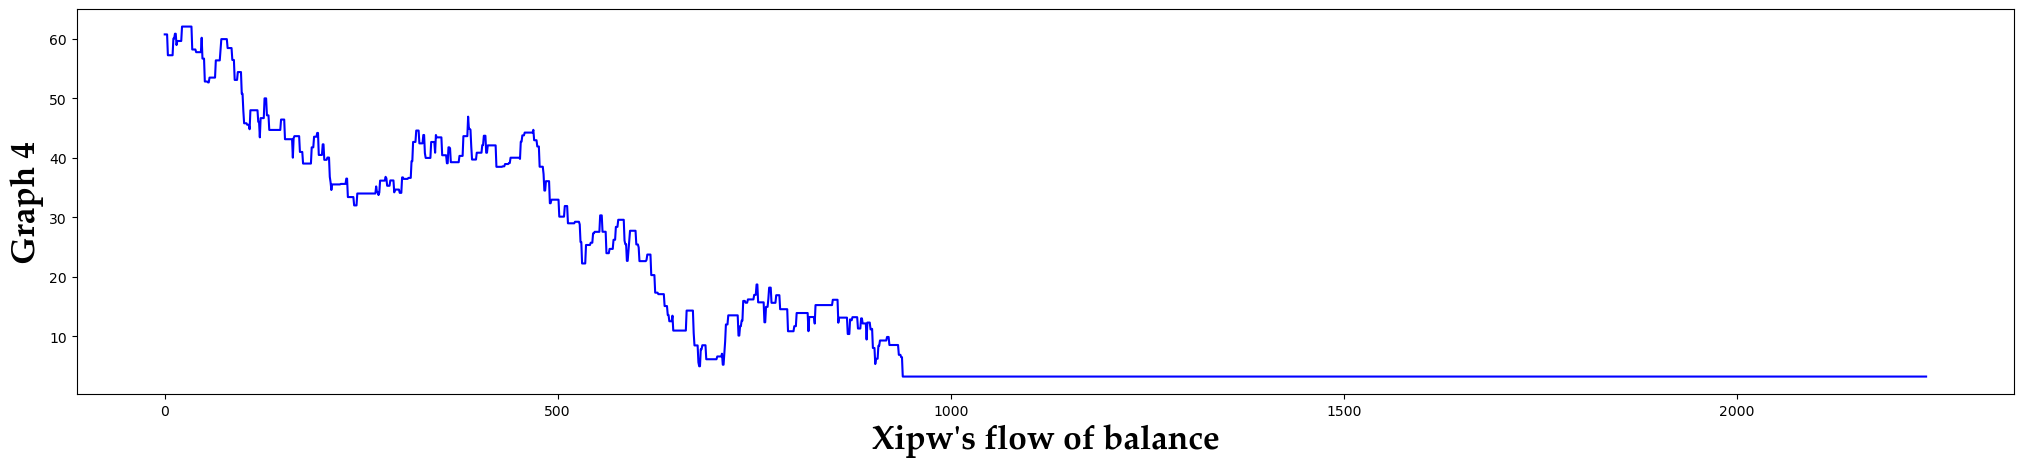

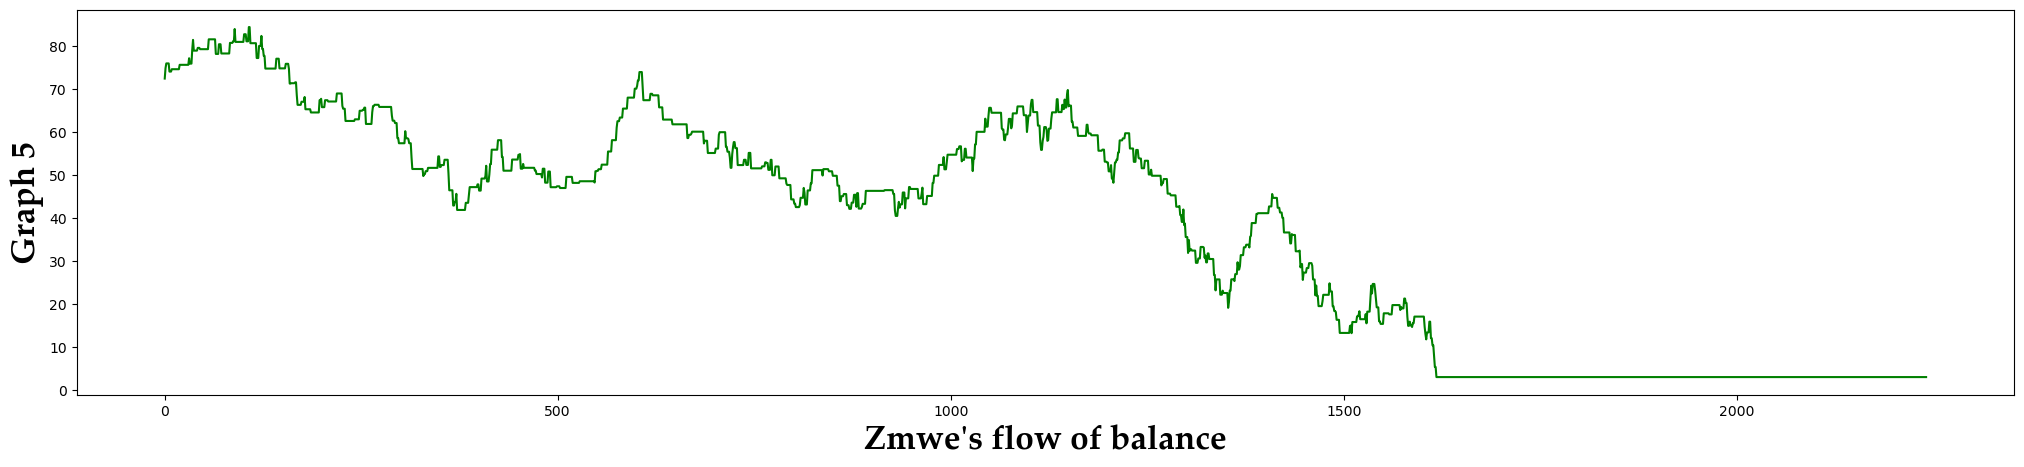

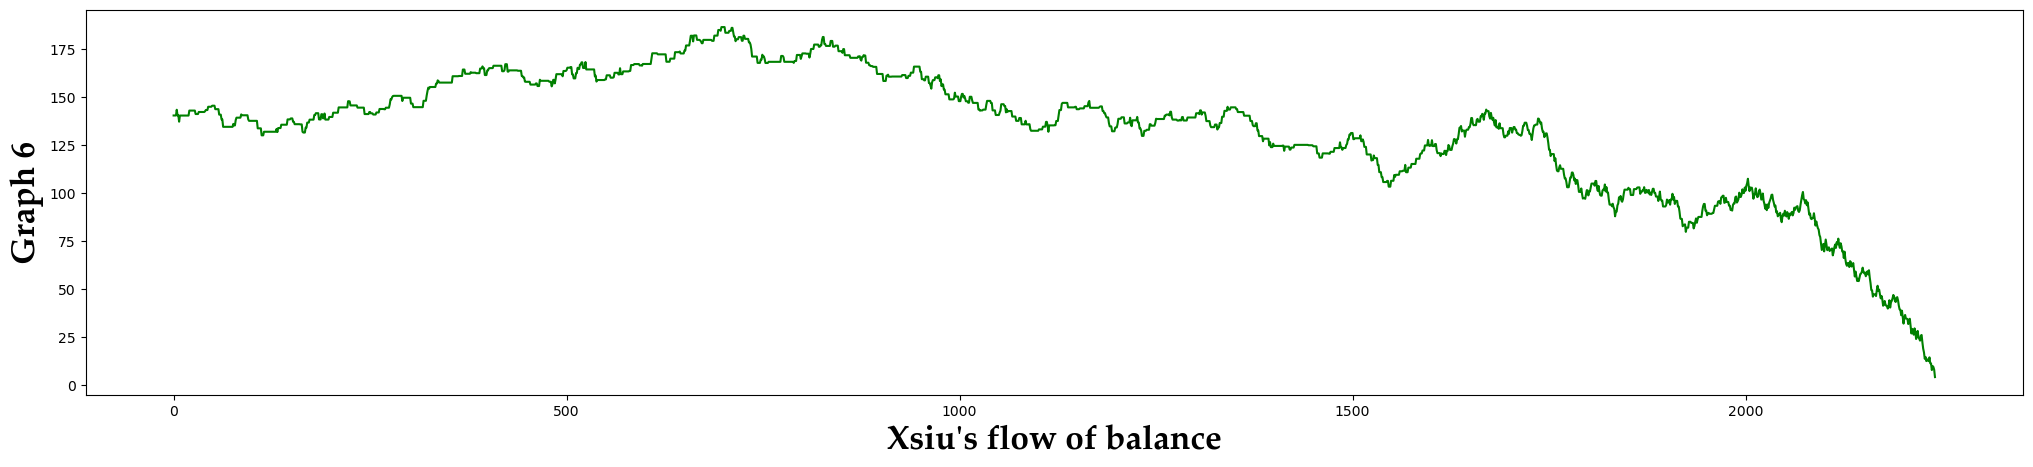

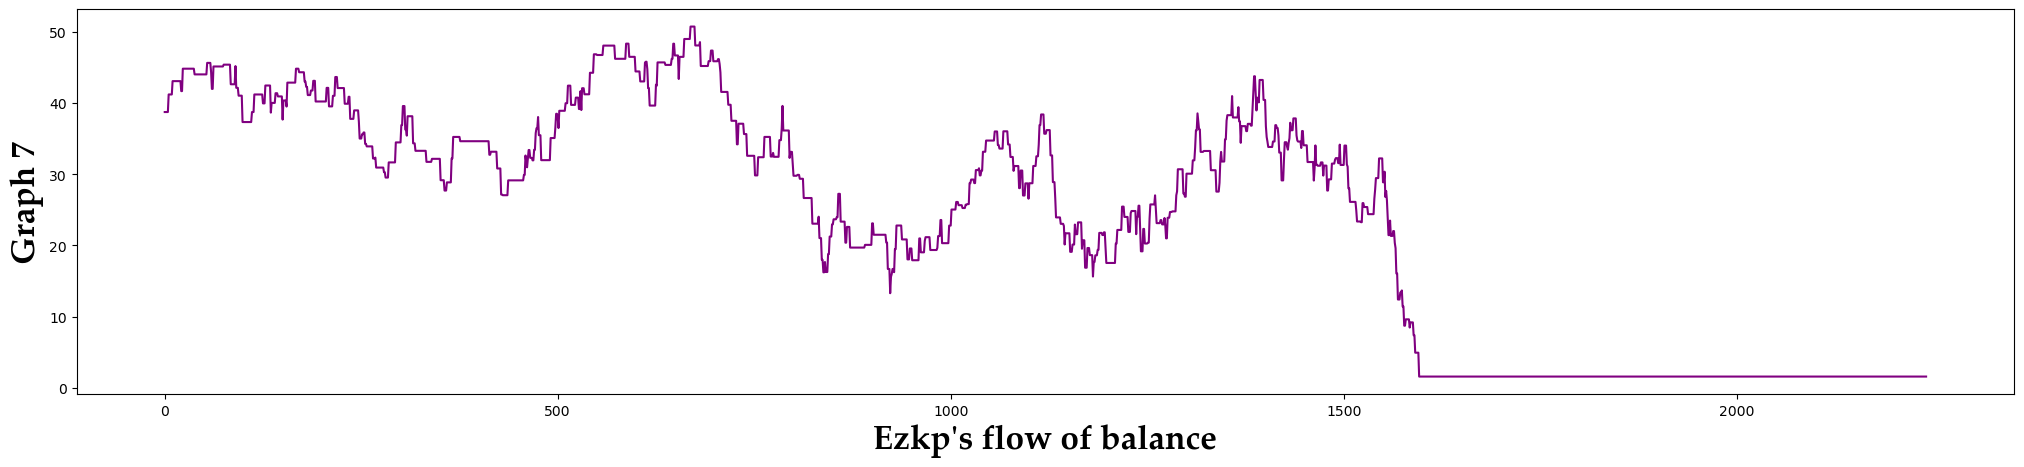

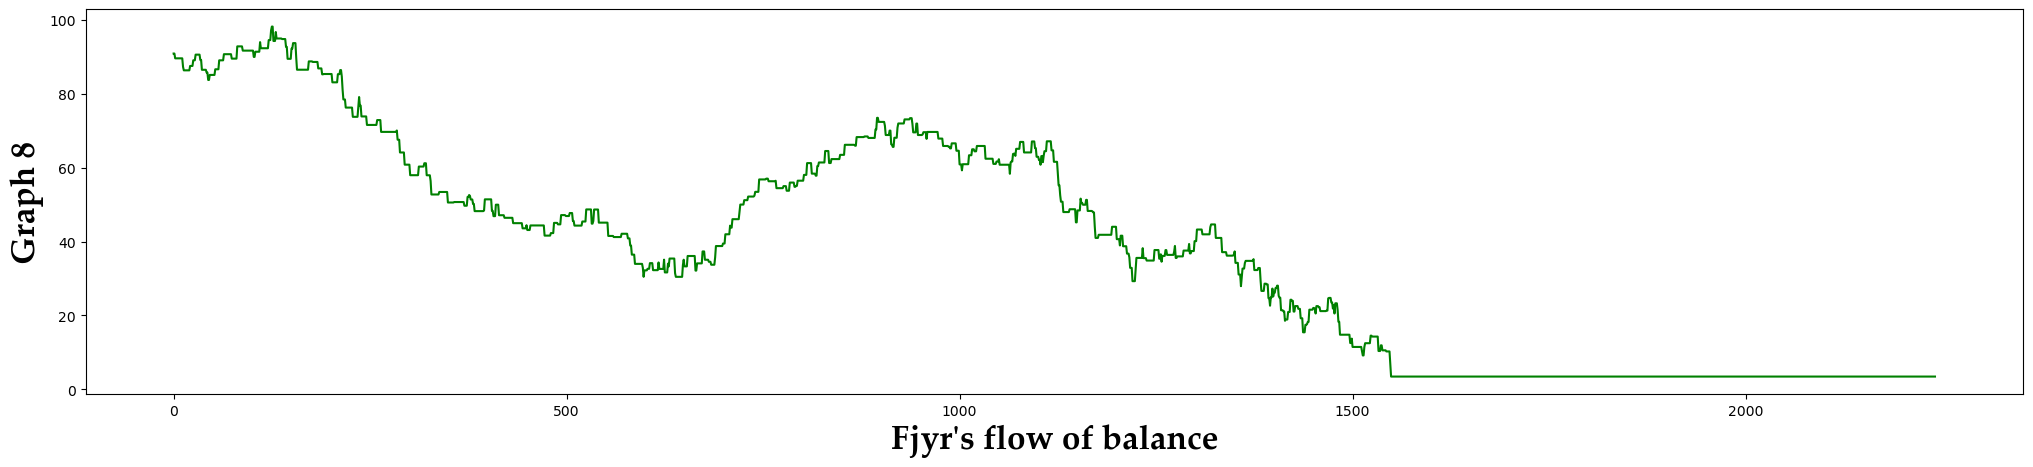

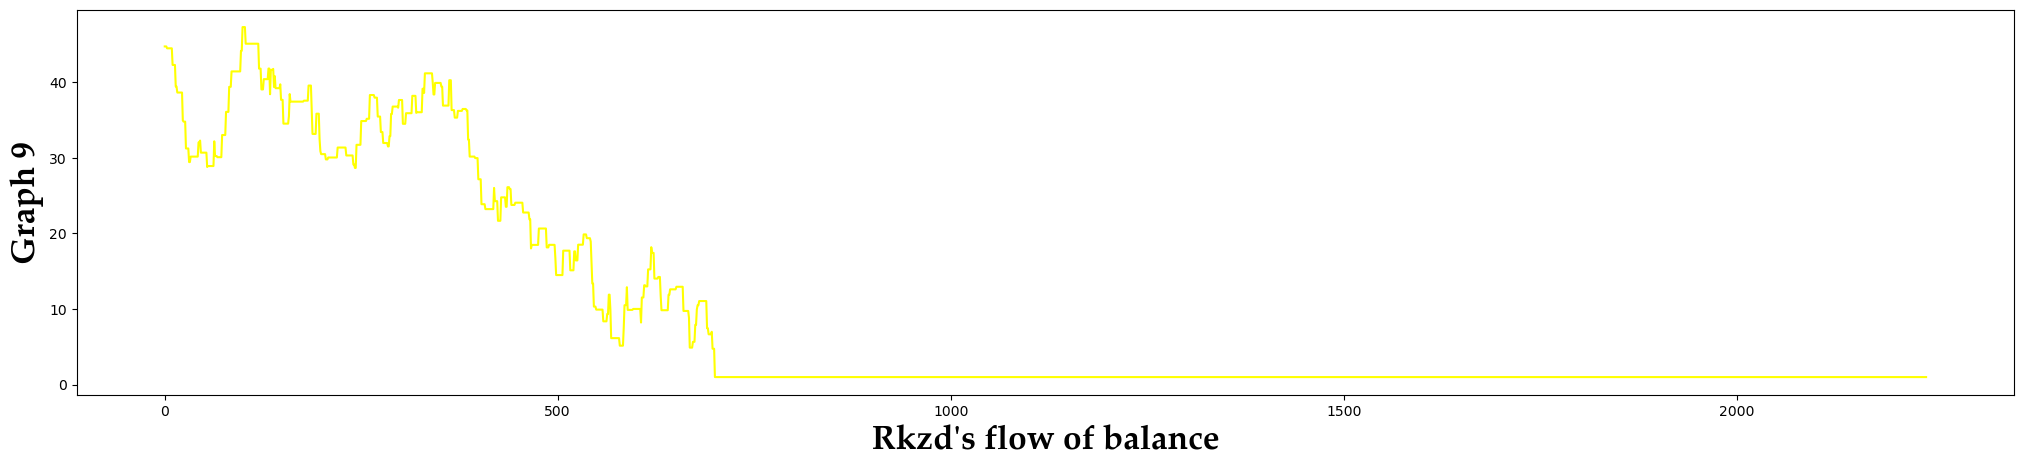

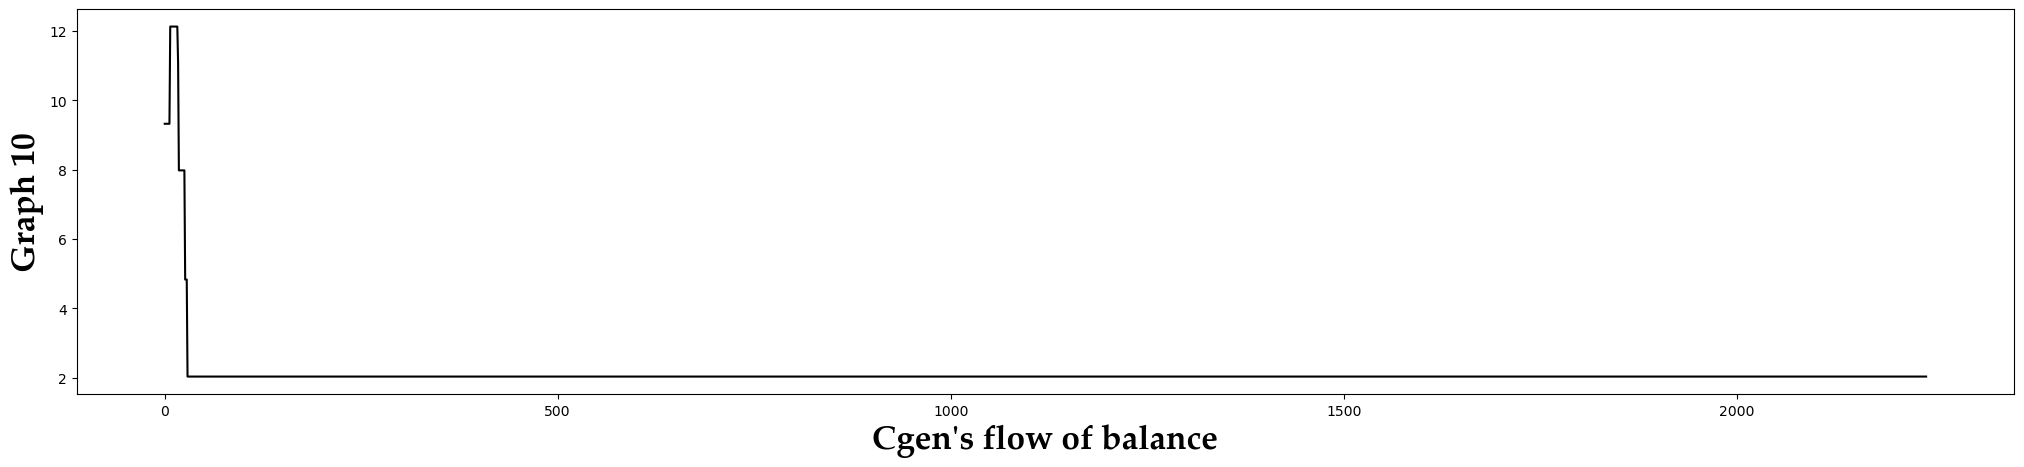

In [9]:
for i in range(number_of_players_in_pool):
    plt.figure(figsize=(25,5))
    matches_df.iloc[:,12+i].plot(kind='line', color= random.choice(['r', 'g','b','k','yellow','black','indigo','teal','purple','brown']))
    plt.xlabel(f"{col_names[12+i]}'s flow of balance", fontdict=font)
    plt.ylabel(f"Graph {i+1}", fontdict=font)
    plt.show()
    i += 1

Text(0, 0.5, 'Count')

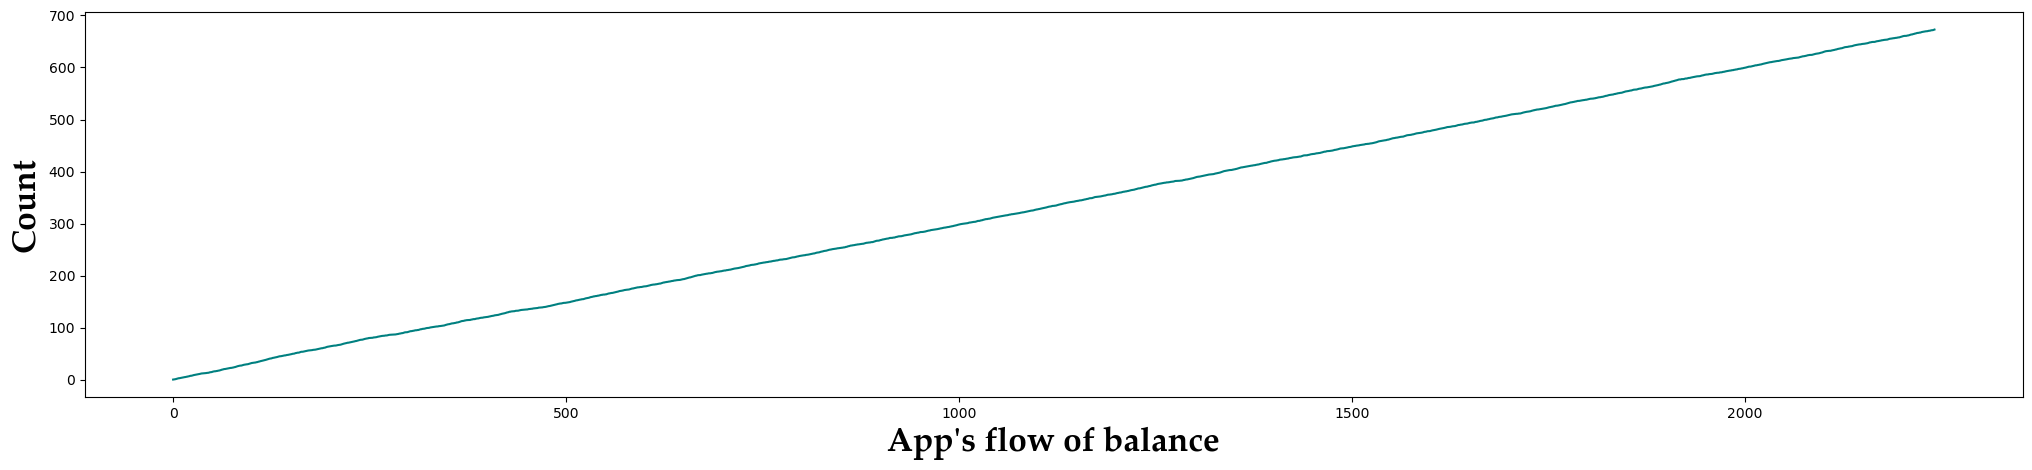

In [10]:
plt.figure(figsize=(25,5))
matches_df['Total Amount Earned by App'].plot(kind='line', color='teal')
plt.xlabel("App's flow of balance", fontdict=font)
plt.ylabel("Count", fontdict=font)

### Linear Regression model preparation

In [11]:
pd.set_option('display.max_rows',100)
matches_df.isnull().sum()

Match Number                    0
Player 1                        0
Player 2                        0
Loser                           0
Winner                          0
Points Lost by Loser            0
Amount Lost by Loser            0
Amount Remaining for Loser      0
Amount to be Credited to App    0
Total Amount Earned by App      0
Amount Won by Winner            0
Amount Remaining for Winner     0
Chqx                            0
Elan                            0
Ygkt                            0
Xipw                            0
Zmwe                            0
Xsiu                            0
Ezkp                            0
Fjyr                            0
Rkzd                            0
Cgen                            0
dtype: int64

In [12]:
predictor = matches_df.drop('Total Amount Earned by App', axis=1)

In [13]:
pd.set_option('display.max_rows',100)
predictor

Match Number Player 1 Player 2 Loser Winner  Points Lost by Loser  \
0                1     Elan     Zmwe  Elan   Zmwe                    57   
1                2     Fjyr     Zmwe  Fjyr   Zmwe                    26   
2                3     Rkzd     Chqx  Rkzd   Chqx                     5   
3                4     Xsiu     Xipw  Xipw   Xsiu                    70   
4                5     Xsiu     Ezkp  Xsiu   Ezkp                    58   
...            ...      ...      ...   ...    ...                   ...   
2237          2238     Xsiu     Chqx  Chqx   Xsiu                    49   
2238          2239     Chqx     Xsiu  Xsiu   Chqx                    10   
2239          2240     Xsiu     Chqx  Xsiu   Chqx                    29   
2240          2241     Chqx     Xsiu  Xsiu   Chqx                    76   
2241          2242     Xsiu     Chqx  Xsiu   Chqx                    69   

      Amount Lost by Loser  Amount Remaining for Loser  \
0                     2.85                     117.742   
1                     1.30                      89.570   
2                     0.25                      44.487   
3                     3.50                      57.201   
4                     2.90                     140.442   
...                    ...                         ...   
2237                  2.45                     104.406   
2238                  0.50                       9.399   
2239                  1.45                       7.949   
2240                  3.80                       4.149   
2241                  3.45                       0.699   

      Amount to be Credited to App  Amount Won by Winner  ...     Chqx  \
0                            0.427                 2.423  ...  132.399   
1                            0.195                 1.105  ...  132.399   
2                            0.037                 0.213  ...  132.399   
3                            0.525                 2.975  ...  132.612   
4                            0.435                 2.465  ...  132.612   
...                            ...                   ...  ...      ...   
2237                         0.367                 2.083  ...  106.856   
2238                         0.075                 0.425  ...  104.406   
2239                         0.217                 1.233  ...  104.831   
2240                         0.570                 3.230  ...  106.064   
2241                         0.517                 2.933  ...  109.294   

         Elan    Ygkt    Xipw    Zmwe     Xsiu    Ezkp    Fjyr    Rkzd   Cgen  
0     120.592  97.339  60.701  72.394  140.367  38.711  90.870  44.737  9.323  
1     117.742  97.339  60.701  74.817  140.367  38.711  90.870  44.737  9.323  
2     117.742  97.339  60.701  75.922  140.367  38.711  89.570  44.737  9.323  
3     117.742  97.339  60.701  75.922  140.367  38.711  89.570  44.487  9.323  
4     117.742  97.339  57.201  75.922  143.342  38.711  89.570  44.487  9.323  
...       ...     ...     ...     ...      ...     ...     ...     ...    ...  
2237    3.786   3.650   3.247   2.917    7.816   1.603   3.458   0.991  2.028  
2238    3.786   3.650   3.247   2.917    9.899   1.603   3.458   0.991  2.028  
2239    3.786   3.650   3.247   2.917    9.399   1.603   3.458   0.991  2.028  
2240    3.786   3.650   3.247   2.917    7.949   1.603   3.458   0.991  2.028  
2241    3.786   3.650   3.247   2.917    4.149   1.603   3.458   0.991  2.028  

[2242 rows x 21 columns]

In [14]:
target = matches_df[['Total Amount Earned by App']]
target

Total Amount Earned by App
0                          0.427
1                          0.622
2                          0.659
3                          1.184
4                          1.619
...                          ...
2237                     671.448
2238                     671.523
2239                     671.740
2240                     672.310
2241                     672.827

[2242 rows x 1 columns]

In [15]:
cat_cols = [col for col in predictor.columns.values if predictor[col].dtype == 'object']

In [16]:
predictor_num = predictor.drop('Match Number',axis=1)

In [17]:
predictor_num = predictor_num.drop(cat_cols, axis=1)
predictor_num

Points Lost by Loser  Amount Lost by Loser  Amount Remaining for Loser  \
0                       57                  2.85                     117.742   
1                       26                  1.30                      89.570   
2                        5                  0.25                      44.487   
3                       70                  3.50                      57.201   
4                       58                  2.90                     140.442   
...                    ...                   ...                         ...   
2237                    49                  2.45                     104.406   
2238                    10                  0.50                       9.399   
2239                    29                  1.45                       7.949   
2240                    76                  3.80                       4.149   
2241                    69                  3.45                       0.699   

      Amount to be Credited to App  Amount Won by Winner  \
0                            0.427                 2.423   
1                            0.195                 1.105   
2                            0.037                 0.213   
3                            0.525                 2.975   
4                            0.435                 2.465   
...                            ...                   ...   
2237                         0.367                 2.083   
2238                         0.075                 0.425   
2239                         0.217                 1.233   
2240                         0.570                 3.230   
2241                         0.517                 2.933   

      Amount Remaining for Winner     Chqx     Elan    Ygkt    Xipw    Zmwe  \
0                          74.817  132.399  120.592  97.339  60.701  72.394   
1                          75.922  132.399  117.742  97.339  60.701  74.817   
2                         132.612  132.399  117.742  97.339  60.701  75.922   
3                         143.342  132.612  117.742  97.339  60.701  75.922   
4                          41.176  132.612  117.742  97.339  57.201  75.922   
...                           ...      ...      ...     ...     ...     ...   
2237                        9.899  106.856    3.786   3.650   3.247   2.917   
2238                      104.831  104.406    3.786   3.650   3.247   2.917   
2239                      106.064  104.831    3.786   3.650   3.247   2.917   
2240                      109.294  106.064    3.786   3.650   3.247   2.917   
2241                      112.227  109.294    3.786   3.650   3.247   2.917   

         Xsiu    Ezkp    Fjyr    Rkzd   Cgen  
0     140.367  38.711  90.870  44.737  9.323  
1     140.367  38.711  90.870  44.737  9.323  
2     140.367  38.711  89.570  44.737  9.323  
3     140.367  38.711  89.570  44.487  9.323  
4     143.342  38.711  89.570  44.487  9.323  
...       ...     ...     ...     ...    ...  
2237    7.816   1.603   3.458   0.991  2.028  
2238    9.899   1.603   3.458   0.991  2.028  
2239    9.399   1.603   3.458   0.991  2.028  
2240    7.949   1.603   3.458   0.991  2.028  
2241    4.149   1.603   3.458   0.991  2.028  

[2242 rows x 16 columns]

### Logarithmic Transformation to convert the target's unifrom distribution to a normal distribution

In [20]:
import numpy as np

target_log = np.log1p(target)

In [21]:
target_log

Total Amount Earned by App
0                       0.355574
1                       0.483660
2                       0.506215
3                       0.781158
4                       0.962793
...                          ...
2237                    6.510925
2238                    6.511036
2239                    6.511359
2240                    6.512206
2241                    6.512973

[2242 rows x 1 columns]

<Axes: ylabel='Count'>

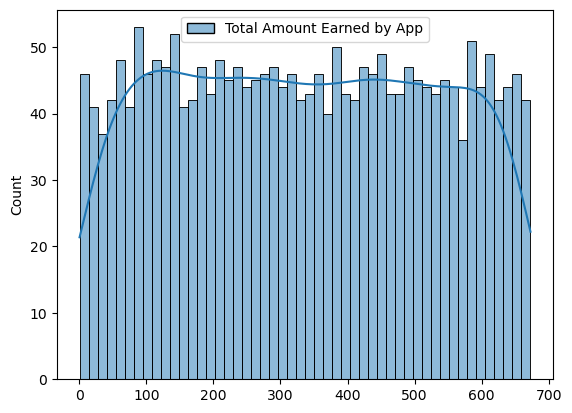

In [22]:
sns.histplot(target, kde=True, bins=50)

<Axes: ylabel='Count'>

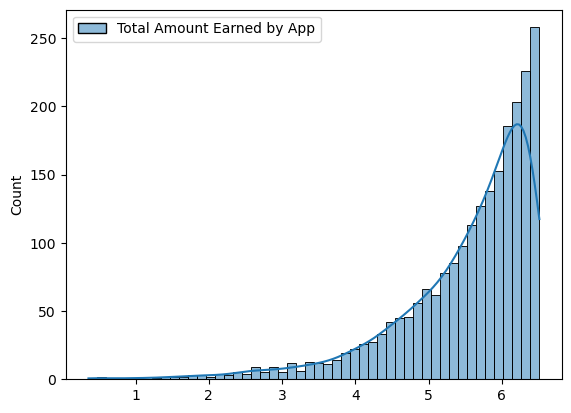

In [23]:
sns.histplot(target_log, kde=True, bins=50)

In [24]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(predictor_num.astype(float), target.astype(float), test_size=0.3, random_state=2024)

In [25]:
X_train.shape

(1569, 16)

In [26]:
x_test.shape

(673, 16)

In [27]:
Y_train.shape

(1569, 1)

In [28]:
y_test.shape

(673, 1)

In [29]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

model1 = lin.fit(X_train, Y_train)

In [30]:
model1.score(x_test,y_test)

1.0

In [31]:
model1.coef_

array([[ 2.49066002e-02,  1.24533001e-03,  6.10622664e-16,
         5.00622665e-01, -4.99377335e-01,  1.94289029e-16,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00]])

In [32]:
model1.intercept_

array([807.433])

In [33]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(x_test)

model2 = sm.OLS(Y_train, X_train).fit()

In [34]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Total Amount Earned by App   R-squared:                       1.000
Model:                                    OLS   Adj. R-squared:                  1.000
Method:                         Least Squares   F-statistic:                 1.008e+29
Date:                        Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                                06:10:47   Log-Likelihood:                 38214.
No. Observations:                        1569   AIC:                        -7.640e+04
Df Residuals:                            1554   BIC:                        -7.632e+04
Df Model:                                  14                                         
Covariance Type:                    nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          807.4330   1.62e-12   4.99e+14      0.000     807.433     807.433
Points Lost by Loser             0.0249   8.37e-12   2.98e+09      0.000       0.025       0.025
Amount Lost by Loser             0.0012   4.18e-13   2.98e+09      0.000       0.001       0.001
Amount Remaining for Loser   -3.317e-15   3.88e-15     -0.855      0.393   -1.09e-14    4.29e-15
Amount to be Credited to App     0.5006    2.4e-10   2.08e+09      0.000       0.501       0.501
Amount Won by Winner            -0.4994    2.4e-10  -2.08e+09      0.000      -0.499      -0.499
Amount Remaining for Winner  -7.883e-15   3.84e-15     -2.053      0.040   -1.54e-14    -3.5e-16
Chqx                            -1.0000   1.53e-14  -6.52e+13      0.000      -1.000      -1.000
Elan                            -1.0000   2.88e-14  -3.47e+13      0.000      -1.000      -1.000
Ygkt                            -1.0000   1.34e-14  -7.44e+13      0.000      -1.000      -1.000
Xipw                            -1.0000   4.68e-14  -2.14e+13      0.000      -1.000      -1.000
Zmwe                            -1.0000   2.05e-14  -4.87e+13      0.000      -1.000      -1.000
Xsiu                            -1.0000   1.09e-14  -9.16e+13      0.000      -1.000      -1.000
Ezkp                            -1.0000   2.56e-14   -3.9e+13      0.000      -1.000      -1.000
Fjyr                            -1.0000   1.43e-14  -6.99e+13      0.000      -1.000      -1.000
Rkzd                            -1.0000   4.47e-14  -2.24e+13      0.000      -1.000      -1.000
Cgen                            -1.0000    1.9e-13  -5.27e+12      0.000      -1.000      -1.000
==============================================================================
Omnibus:                       69.996   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.591
Skew:                           0.441   Prob(JB):                     1.29e-20
Kurtosis:                       3.788   Cond. No.                     9.45e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.93e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
round(model2.pvalues, 3)

const                           0.000
Points Lost by Loser            0.000
Amount Lost by Loser            0.000
Amount Remaining for Loser      0.393
Amount to be Credited to App    0.000
Amount Won by Winner            0.000
Amount Remaining for Winner     0.040
Chqx                            0.000
Elan                            0.000
Ygkt                            0.000
Xipw                            0.000
Zmwe                            0.000
Xsiu                            0.000
Ezkp                            0.000
Fjyr                            0.000
Rkzd                            0.000
Cgen                            0.000
dtype: float64

In [36]:
y_pred = model2.predict(X_test)

In [37]:
def rmse(predictions, targets):
    differences = predictions - targets
    differences_squared = differences**2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_val

In [41]:
y_test_ravel = np.array(y_test).ravel()
rmse(y_pred,y_test_ravel)

6.50598800008263e-12

In [42]:
cols = ['Model', 'R-squared value', 'Adjusted.R-squared value', 'RMSE']
models_report = pd.DataFrame(columns = cols)

tmp3 = ({'Model': "Base Linear Model",
        'R-squared value' : model2.rsquared,
        'Adjusted.R-squared value': model2.rsquared_adj,
        'RMSE': round(rmse(y_pred, y_test_ravel),3)})

model2_report = models_report._append(tmp3, ignore_index = True)
model2_report

Model  R-squared value  Adjusted.R-squared value  RMSE
0  Base Linear Model              1.0                       1.0   0.0

In [43]:
y_pred_ravel = np.array(y_pred).ravel()
y_test_ravel = np.array(y_test).ravel()
Result = []

for idx in range(len(y_pred_ravel)):
    predicted_value = y_pred_ravel[idx]
    actual_value = y_test_ravel[idx]
    if round(predicted_value,3) == round(actual_value,3):
        result = 'True'
    else:
        result = 'False'
    Result.append([predicted_value, actual_value, result])


Prediction = pd.DataFrame(Result, columns=['Predicted', 'Actual', 'Result'])

Prediction

Predicted   Actual Result
0       98.243   98.243   True
1      358.882  358.882   True
2        2.399    2.399   True
3       28.341   28.341   True
4      422.349  422.349   True
..         ...      ...    ...
668    636.467  636.467   True
669    183.574  183.574   True
670    547.412  547.412   True
671    212.351  212.351   True
672    312.862  312.862   True

[673 rows x 3 columns]

In [44]:
Prediction['Result'].value_counts()

True    673
Name: Result, dtype: int64

### Relationship between App's earnings and Pool's money flow

In [45]:
matches_df.columns

Index(['Match Number', 'Player 1', 'Player 2', 'Loser', 'Winner',
       'Points Lost by Loser', 'Amount Lost by Loser',
       'Amount Remaining for Loser', 'Amount to be Credited to App',
       'Total Amount Earned by App', 'Amount Won by Winner',
       'Amount Remaining for Winner', 'Chqx', 'Elan', 'Ygkt', 'Xipw', 'Zmwe',
       'Xsiu', 'Ezkp', 'Fjyr', 'Rkzd', 'Cgen'],
      dtype='object')

In [46]:
matches_df_comparison = matches_df.drop(['Match Number', 'Player 1', 'Player 2', 'Loser', 'Winner',
       'Points Lost by Loser', 'Amount Lost by Loser',
       'Amount Remaining for Loser', 'Amount to be Credited to App','Amount Won by Winner',
       'Amount Remaining for Winner'], axis=1)

In [47]:
sum_all = matches_df_comparison.drop('Total Amount Earned by App', axis=1)

In [48]:
sum_all.shape

(2242, 10)

In [49]:
matches_df_comparison['Amount involved in the pool each match'] = sum_all.sum(axis=1)

In [50]:
matches_df_comparison

Total Amount Earned by App     Chqx     Elan    Ygkt    Xipw    Zmwe  \
0                          0.427  132.399  120.592  97.339  60.701  72.394   
1                          0.622  132.399  117.742  97.339  60.701  74.817   
2                          0.659  132.399  117.742  97.339  60.701  75.922   
3                          1.184  132.612  117.742  97.339  60.701  75.922   
4                          1.619  132.612  117.742  97.339  57.201  75.922   
...                          ...      ...      ...     ...     ...     ...   
2237                     671.448  106.856    3.786   3.650   3.247   2.917   
2238                     671.523  104.406    3.786   3.650   3.247   2.917   
2239                     671.740  104.831    3.786   3.650   3.247   2.917   
2240                     672.310  106.064    3.786   3.650   3.247   2.917   
2241                     672.827  109.294    3.786   3.650   3.247   2.917   

         Xsiu    Ezkp    Fjyr    Rkzd   Cgen  \
0     140.367  38.711  90.870  44.737  9.323   
1     140.367  38.711  90.870  44.737  9.323   
2     140.367  38.711  89.570  44.737  9.323   
3     140.367  38.711  89.570  44.487  9.323   
4     143.342  38.711  89.570  44.487  9.323   
...       ...     ...     ...     ...    ...   
2237    7.816   1.603   3.458   0.991  2.028   
2238    9.899   1.603   3.458   0.991  2.028   
2239    9.399   1.603   3.458   0.991  2.028   
2240    7.949   1.603   3.458   0.991  2.028   
2241    4.149   1.603   3.458   0.991  2.028   

      Amount involved in the pool each match  
0                                    807.433  
1                                    807.006  
2                                    806.811  
3                                    806.774  
4                                    806.249  
...                                      ...  
2237                                 136.352  
2238                                 135.985  
2239                                 135.910  
2240                                 135.693  
2241                                 135.123  

[2242 rows x 12 columns]

(<seaborn.axisgrid.FacetGrid at 0x2a026a20f90>,
 <seaborn.axisgrid.FacetGrid at 0x2a026a04410>)

<Figure size 500x500 with 0 Axes>

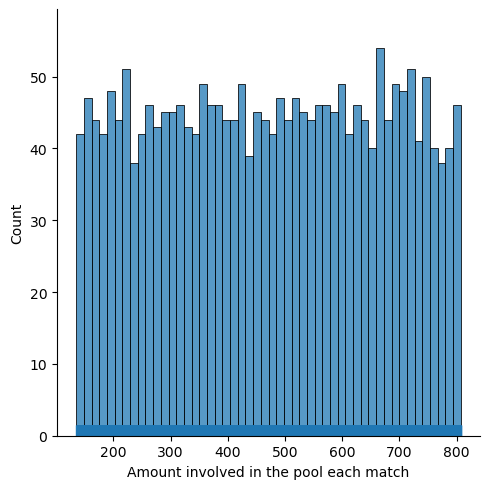

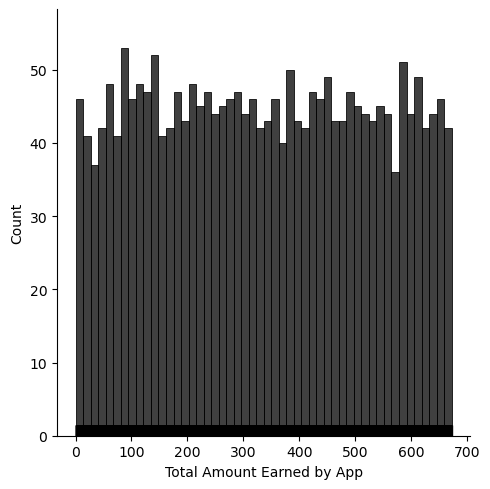

In [51]:
plt.figure(figsize=(5,5))

sns.displot(data=matches_df_comparison, x='Amount involved in the pool each match',rug=True, bins=50), sns.displot(data=matches_df_comparison, x='Total Amount Earned by App', color='black', rug=True, bins=50)

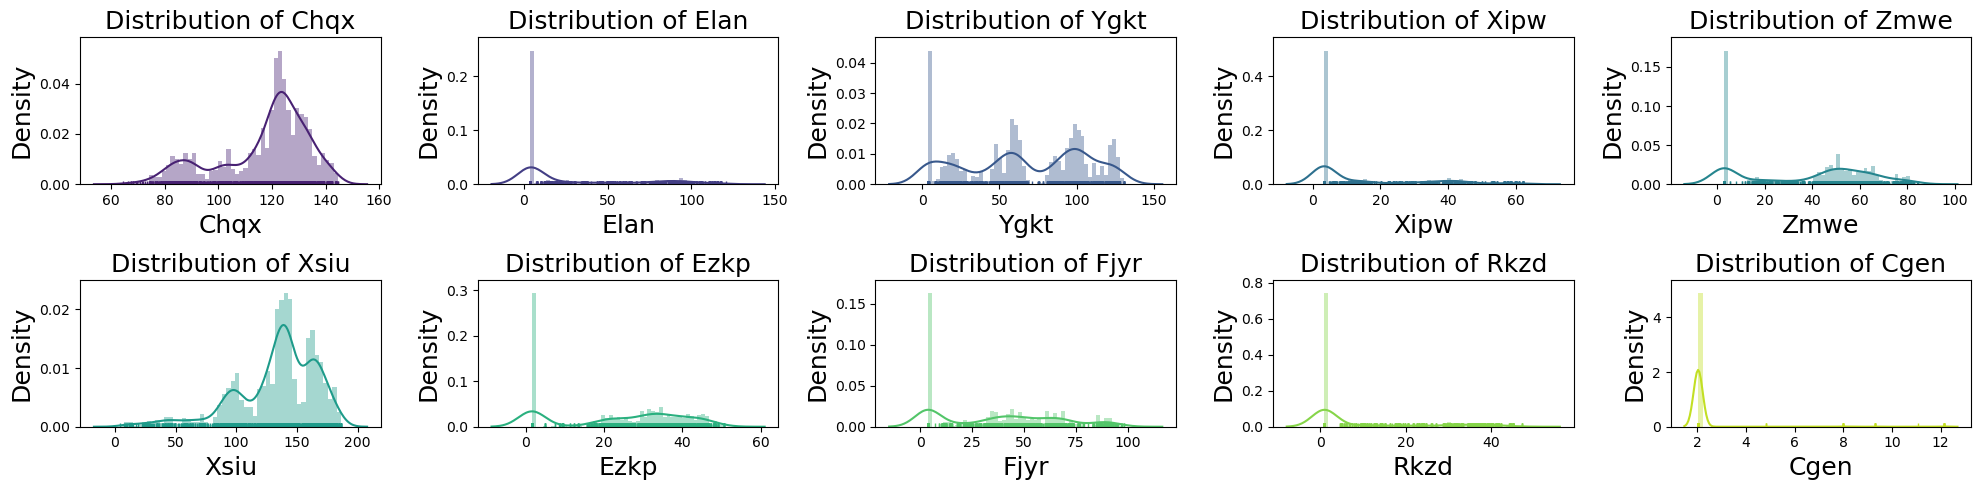

In [52]:
palette = sns.color_palette("viridis", len(sum_all.columns))


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 5))  
axes = axes.flatten()  

for i, (column, color) in enumerate(zip(sum_all.columns, palette)):
    sns.distplot(sum_all[column], ax=axes[i], rug=True, bins=50, color=color,)
    axes[i].set_title(f'Distribution of {column}', fontsize=18)
    axes[i].set_xlabel(column, fontsize=18)
    axes[i].set_ylabel('Density', fontsize=18)


plt.tight_layout()
plt.show()

In [53]:
matches_df_comparison.columns

Index(['Total Amount Earned by App', 'Chqx', 'Elan', 'Ygkt', 'Xipw', 'Zmwe',
       'Xsiu', 'Ezkp', 'Fjyr', 'Rkzd', 'Cgen',
       'Amount involved in the pool each match'],
      dtype='object')

In [54]:
Percentage_of_earnings_for_app = matches_df_comparison['Total Amount Earned by App'].iloc[-1]/matches_df_comparison['Amount involved in the pool each match'].iloc[0]
Percentage_of_earnings_for_app

0.8332914309917964

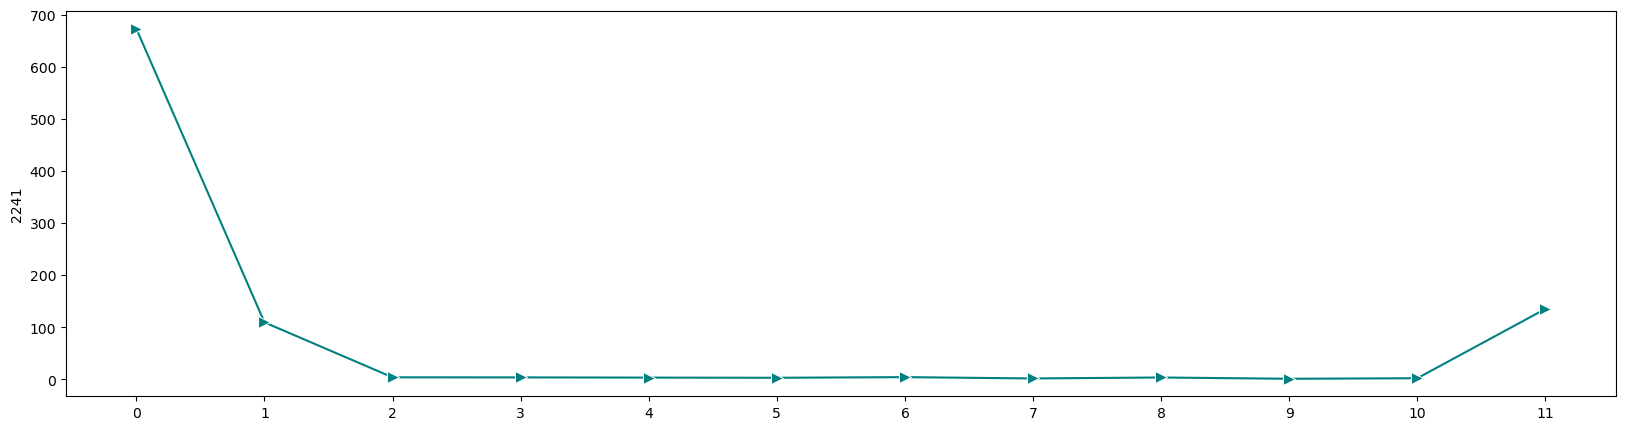

In [110]:
matches_df_comparison_all = matches_df_comparison.copy()
current_columns = matches_df_comparison.columns.tolist()

new_columns = [f"{i}" for i in range(len(current_columns))]

matches_df_comparison_all.columns = new_columns
plt.figure(figsize=(20,5))
sns.lineplot(matches_df_comparison_all.iloc[-1], marker='>', markersize=8, color='teal');

In [56]:
matches_df_comparison.columns[1]

'Chqx'

In [57]:
matches_df_comparison.columns[0]

'Total Amount Earned by App'

In [63]:
matches_df_comparison.columns[11]

'Amount involved in the pool each match'

In [58]:
%store matches_df

Stored 'matches_df' (DataFrame)


In [59]:
%store number_of_players_in_pool

Stored 'number_of_players_in_pool' (int)


In [60]:
%store totalPlayers

Stored 'totalPlayers' (dict)


In [61]:
players = list(totalPlayers.keys())
players.append('Total Amount Earned by App')

In [62]:
players

['Chqx',
 'Elan',
 'Ygkt',
 'Xipw',
 'Zmwe',
 'Xsiu',
 'Ezkp',
 'Fjyr',
 'Rkzd',
 'Cgen',
 'Total Amount Earned by App']